In [295]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
#matplotlib.rcParams['font.size'] = 8
#matplotlib.rcParams['figure.figsize'] = (5, 5)

import seaborn as sns #plot figures
from IPython.core.pylabtools import figsize

# Scipy helper functions
import scipy #get statistics percentile
from scipy.stats import percentileofscore
from scipy import stats

In [296]:
tweets_total = pd.read_csv('tweetstotal.csv',encoding= 'utf-8')

In [297]:
#tweets_total.head(5).append(tweets_total.tail(5))

In [298]:
tweets_total = tweets_total.drop(columns=['Unnamed: 0'])

In [299]:
#tweets_total.head(5).append(tweets_total.tail(5))

In [300]:
tweets_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10907 entries, 0 to 10906
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       10907 non-null  object
 1   Author ID  10907 non-null  int64 
 2   Tweet      10907 non-null  object
dtypes: int64(1), object(2)
memory usage: 255.8+ KB


In [301]:
tweets_total.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10902     True
10903    False
10904    False
10905    False
10906    False
Length: 10907, dtype: bool

In [302]:
tweets_total[tweets_total.duplicated()].head(5)

,Time,Author ID,Tweet
563,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha..."
564,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds..."
719,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB
1003,2017-12-29 16:30:57+00:00,963496597,Gay man in #Singapore blocked from adopting hi...
1010,2017-12-29 15:08:50+00:00,2823017921,RT @Dyke67ny: Court rejects gay Singapore man'...


In [303]:
tweets_total = tweets_total.drop_duplicates()

In [304]:
tweets_total[tweets_total.duplicated()]

,Time,Author ID,Tweet


In [305]:
tweets_total['Date'] = tweets_total['Time'].map(lambda x:x.split(' ')[0])
#tweets_total['Time_1'] = tweets_total['Time'].map(lambda x:x.split(' ')[1])

tweets_total['Date'] = pd.to_datetime(tweets_total['Date'])

#tweets_total.set_index('Date',inplace=True)

#tweets_total['Year'] = tweets_total.index.year
#tweets_total['Month'] = tweets_total.index.month
#tweets_total['Weekday'] = tweets_total.index.weekday


tweets_total.head(5).append(tweets_total.tail(5))

,Time,Author ID,Tweet,Date
0,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha...",2017-12-12
1,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds...",2017-12-12
2,2017-11-29 16:48:02+00:00,820846679398051840,Singapore’s gay circle has way too many #metoo...,2017-11-29
3,2017-11-04 13:32:18+00:00,905756070202576896,disclaimer i know nothing abt johnten but. the...,2017-11-04
4,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB,2017-10-08
10901,2022-02-28 11:59:03+00:00,27987687,Singapore court refuses to overturn archaic ga...,2022-02-28
10903,2022-02-28 11:48:30+00:00,3158178364,RT @HumanDignityT: BREAKING: Partial victory a...,2022-02-28
10904,2022-02-28 11:32:08+00:00,23029296,RT @afa_singapore: AfA Singapore is deeply dis...,2022-02-28
10905,2022-02-28 11:31:03+00:00,881337963505868800,RT @kixes: The conclusion from #Singapore’s Co...,2022-02-28
10906,2022-02-28 11:27:03+00:00,16922687,"RT @raynerkjtan: Today, the Singapore Court of...",2022-02-28


In [306]:
#print('2017',tweets_total.loc['2017']['Month'].value_counts().sort_index())
#print('2018',tweets_total.loc['2018']['Month'].value_counts().sort_index())
#print('2019',tweets_total.loc['2019']['Month'].value_counts().sort_index())
#print('2020',tweets_total.loc['2020']['Month'].value_counts().sort_index())
#print('2021',tweets_total.loc['2021']['Month'].value_counts().sort_index())
#print('2022',tweets_total.loc['2022']['Month'].value_counts().sort_index())


In [307]:
#tweets_total.info()

Select Data

# Text preprocessing

In [308]:
# clean the news content by using clean method from hero package
import texthero as hero

In [309]:
#create custom pipeline
custom_pipeline = [hero.preprocessing.fillna,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_whitespace,
                   hero.preprocessing.remove_urls,
                   hero.preprocessing.remove_stopwords,
                   hero.preprocessing.remove_punctuation,
                   hero.preprocessing.remove_diacritics,
                   hero.preprocessing.remove_digits
                   ]

tweets_total['clean_Tweet'] = tweets_total['Tweet'].pipe(hero.clean, custom_pipeline)

In [310]:
#tweets_total['clean_Tweet'] = hero.remove_urls(tweets_total['Tweet'])
#tweets_total.iloc[0].clean_Tweet

In [311]:
# clean the Tweet by using clean method from hero package
#tweets_total['clean_Tweet'] = hero.clean(tweets_total['clean_Tweet'])

In [312]:
#show unclean and clean Tweet

#tweets_total[['Tweet','clean_Tweet']].head(5)

In [313]:
#tweets_total.iloc[:].Tweet  #unclean tweets

In [314]:
#tweets_total.iloc[:].clean_Tweet #clean tweets

In [315]:
tweets_total.to_csv('tweetstotal_clean.csv')

# Visualization

# Wordclouds

In [316]:
#Plot wordcloud image using WordCloud method
#hero.wordcloud(tweets_total.loc[:, 'clean_Tweet'], max_words=80)

### hero.wordcloud(tweets_gay.loc[:, 'clean_Tweet'], max_words=80)

In [317]:
#hero.wordcloud(tweets_lgbt.loc[:, 'clean_Tweet'], max_words=80)

In [318]:
#hero.wordcloud(tweets_lesbian.loc[:, 'clean_Tweet'], max_words=80)

In [319]:
#hero.wordcloud(tweets_377a.loc[:, 'clean_Tweet'], max_words=80)

In [320]:
#conda install -c districtdatalabs yellowbrick

In [321]:
#from yellowbrick.text import DispersionPlot
#from yellowbrick.datasets import load_hobbies

# Load the text data
#tweets_total = load_hobbies()

# Create a list of words from the corpus text
#text = [doc.split() for doc in tweets_total.data]

# Choose words whose occurence in the text will be plotted
#target_words = ['singapore','gay','lgbt','lesbian','sex','377a','wars','pinkdot']

# Create the visualizer and draw the plot
#visualizer = DispersionPlot(target_words)
#visualizer.fit(tweets_total)
#visualizer.show()

In [322]:
#creat a series for regex scarch via clean_Tweet
top_words = '|'.join(('singapore','gay','lgbt','lesbian','sex','377a','wars','pinkdot'))

tweets_total['top_words_pres'] = tweets_total['clean_Tweet'].str.contains(top_words)
tweets_total.top_words_pres.value_counts()

True     9711
False     491
Name: top_words_pres, dtype: int64

In [323]:
#tweets_total.head(5).append(tweets_total.tail(5))

In [324]:
import string

#creat a list of top words
top_words = ['singapore','gay','lgbt','lesbian','sex','377a','wars','pinkdot']
punctuation = ',?!.\/#@"><[]'

def top_words_finder(x):
    list_of_words = x.split(' ')
    out_data = []
    for word in list_of_words:
        word = word.lower()
        if word.strip(punctuation) in top_words:
            return word.strip(punctuation)
        else:
            pass

tweets_total['top_words_list'] = tweets_total['clean_Tweet'].apply(top_words_finder)
tweets_total.top_words_list.value_counts()

singapore    4250
gay          1469
lgbt         1061
377a          805
wars          751
lesbian       610
pinkdot       334
sex           263
Name: top_words_list, dtype: int64

In [325]:
from matplotlib.pylab import date2num
tweets_total['Date'] = date2num(tweets_total['Date'])
#Convert to default dateformat
tweets_total['Time_1'] = pd.to_datetime(tweets_total['Time'])
#Drop None value, in case of error 
tweets_total = tweets_total.dropna(subset=['top_words_list'])
#Sort by date
tweets_total = tweets_total.sort_values(by = "Time_1")
#tweets_total['Date'] = tweets_total['Date'].apply(lambda x: x.value)

tweets_total.info()
#df['time'] = df['time'].apply(lambda x: x.value)
tweets_total

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10202 entries, 0 to 10906
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            10202 non-null  object 
 1   Author ID       10202 non-null  int64  
 2   Tweet           10202 non-null  object 
 3   Date            10202 non-null  float64
 4   clean_Tweet     10202 non-null  object 
 5   top_words_pres  10202 non-null  bool   
 6   top_words_list  9543 non-null   object 
 7   Date_1          10202 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 647.6+ KB


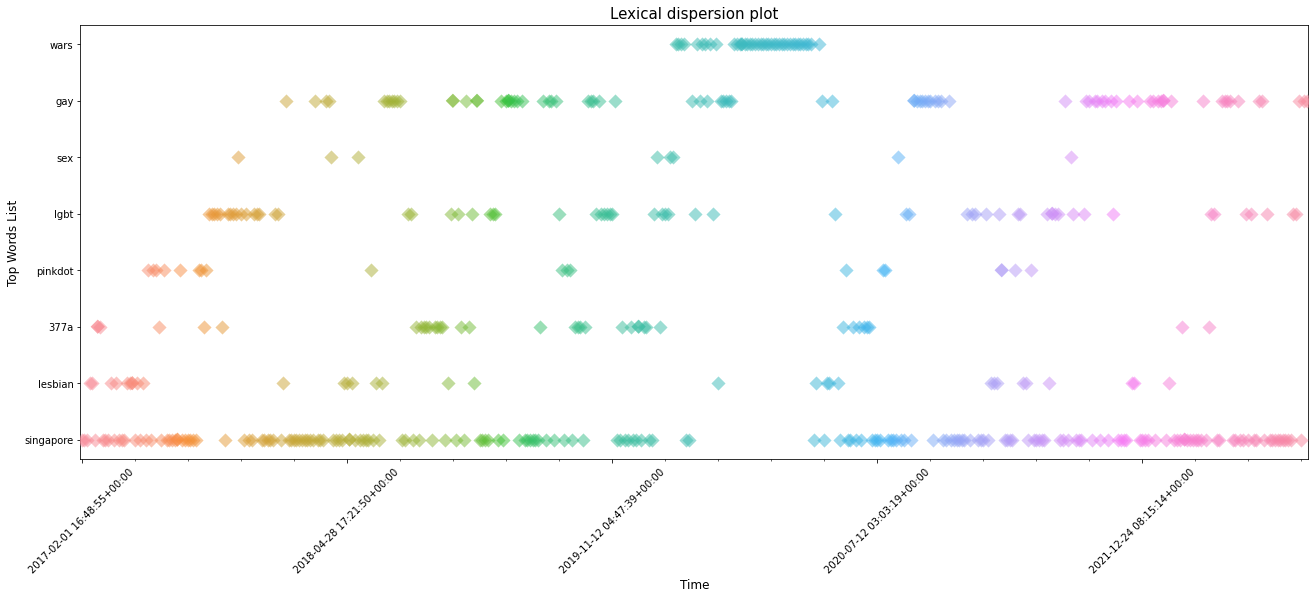

In [361]:
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize = (22,8))

ax = sns.stripplot(x='Time_1', y='top_words_list', data=tweets_total,
             size=10,marker='D',edgecolor='gray',alpha=.50)

#x = [1,2,3,4,5,6]
#labels =  ['2017','2018','2019','2020','2021','2022']

ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

#plt.xticks(x, labels, rotation=45)
#plt.xticks(rotation=90)
plt.xticks(rotation=45)
plt.xlabel('Time',fontsize=12); 
plt.ylabel('Top Words List',fontsize=12); 
plt.title('Lexical dispersion plot',fontsize=15);



In [40]:
#tweets_total.head(5).append(tweets_total.tail(5))

# Model Building